In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

In [2]:
dataset2 = pd.read_csv('./db/salarios.csv')
dataset2.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [3]:
paises = ['VZ','MX','CO','BR','AR','US']

In [4]:
new_column = [paises[np.random.randint(0,len(paises))] for i in range(30)] #Crea paises de forma aleatoria
new_column[:5]

['CO', 'VZ', 'BR', 'AR', 'MX']

In [5]:
dataset2['Pais'] = new_column
dataset2.head(5)

,Aexperiencia,Salario,Pais
0,10.0,42500,CO
1,8.0,36302,VZ
2,5.4,35000,BR
3,2.5,18103,AR
4,1.0,15000,MX


In [6]:
dataset2['NormPaises'] = pd.factorize(dataset2['Pais'])[0]
dataset2.head(5)

,Aexperiencia,Salario,Pais,NormPaises
0,10.0,42500,CO,0
1,8.0,36302,VZ,1
2,5.4,35000,BR,2
3,2.5,18103,AR,3
4,1.0,15000,MX,4


In [7]:
x = dataset2[['Aexperiencia','NormPaises']]
y = dataset2['Salario']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.6, random_state=0)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9143580644159413

Text(0.5, 0, 'Salario')

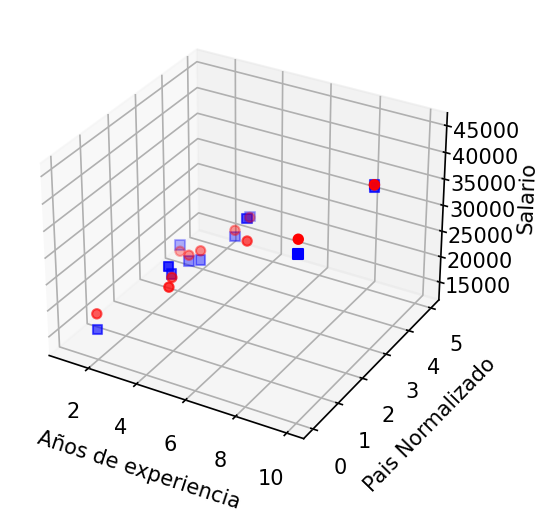

In [13]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],y_train,c='b',marker='s')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],regressor.predict(X_train),c='r',marker='o')
ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Pais Normalizado')
ax.set_zlabel('Salario')